In [ ]:
# import dill
# dill.load_session('i24.db')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import main
from Graph import Graph
from Node import Node
from Edge import Edge
import plot_graph

In [2]:
input_directory = r"C:\I24 Motion Project\Anomaly Detection\csv\TM_1000_GT.csv"
df = main.read_full_data(input_directory, 0)

In [3]:
# GraphAr is an list of Graphs. Each index corresponds to the frame of the inputted csv file.
GraphAr = []
maxFrameNum = int(max(df['Frame #']))

for frame in range(maxFrameNum) :
    MyGraph = Graph()
    
    one_frame_df = df.loc[(df['Frame #'] == frame)].sort_values('x').reset_index()
    one_frame_matrix = np.array(one_frame_df)

    # Add all the nodes(cars) to MyGraph.
    for one_row in one_frame_matrix :
        ID, x_pos, y_pos = one_row[2], one_row[3], one_row[4]
        car_node = Node(ID,x_pos,y_pos,0)
        MyGraph.add_node(car_node)

    # Add all the edges(relationship between cars) thru sliding window approach
    i = 0

    while(len(one_frame_df) != 0) :
        # 1. Prepare ego car node to create edges with.
        ego_car_node = Node(one_frame_df.at[i, 'ID'], 
                            one_frame_df.at[i, 'x'], 
                            one_frame_df.at[i, 'y'], 
                            0)
        window_start = one_frame_df.at[i, 'x']                              # 2. Get x position of left-most car
        window_df = one_frame_df.loc[one_frame_df['x'] < window_start + 40] # 3. Select all cars within window
        # 4. Translate all cars in window as edges and add to graph.
        window_ar = np.array(window_df)

        for car in window_ar :
            ID, x_pos, y_pos = car[2], car[3], car[4]
            car_node = Node(ID, x_pos, y_pos, 0)
            edge1, edge2 = Edge(ego_car_node, car_node), Edge(car_node, ego_car_node)
            MyGraph.add_edge(edge1)
            MyGraph.add_edge(edge2)

        # 5. Drop the very first row.
        one_frame_df.drop(index=i,inplace=True)
        i += 1
        
    GraphAr.append(MyGraph)
    
    # Processing progress report
    if frame % 50 == 0 :
        print("Processing Completion : {:0.2f} %".format((frame / maxFrameNum) * 100 ), end="\r")

True


<IPython.core.display.Javascript object>


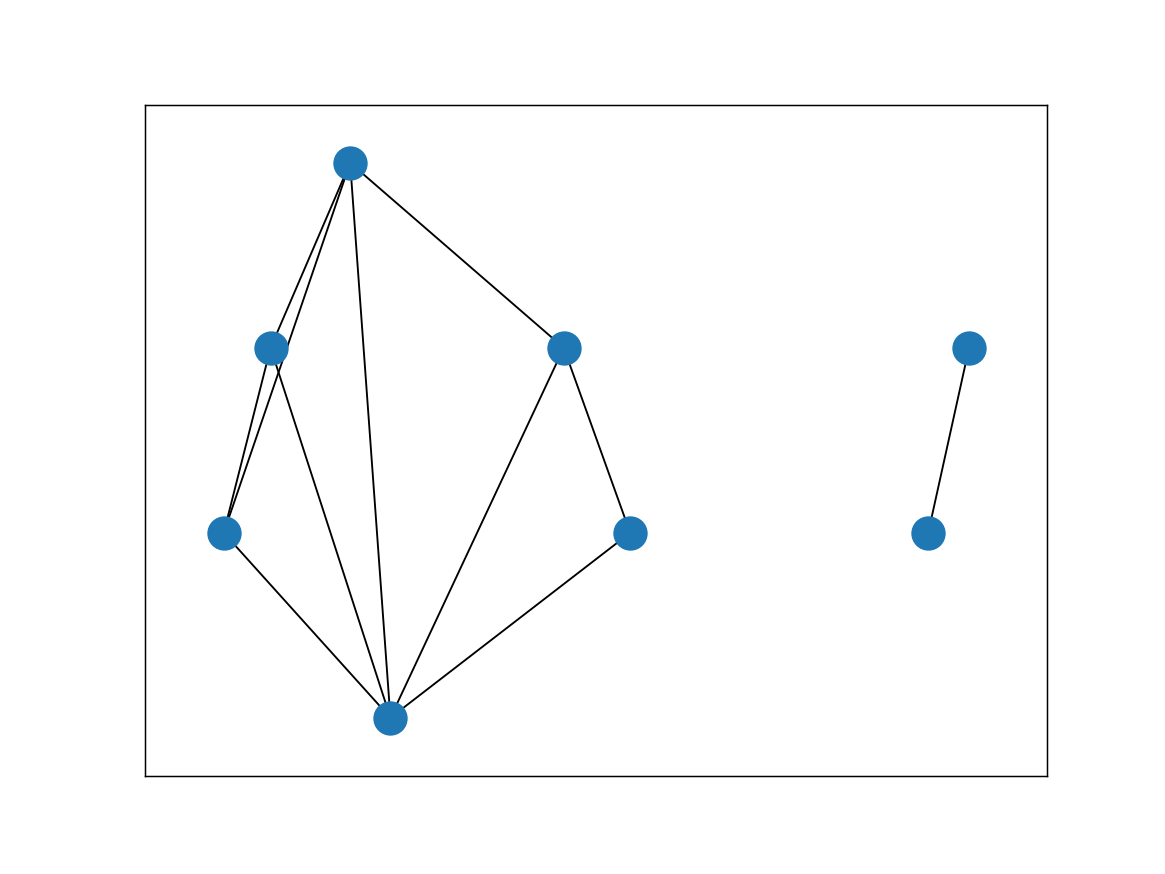

In [4]:
%matplotlib notebook

# The index for GraphAr will represent the Frame.
plot_graph.plot_graph(GraphAr[100])

In [5]:
import dill
dill.dump_session('i24.db')